In [2]:
import os
from openai import OpenAI 

## Set the API key and model name
MODEL="gpt-4o-mini"
api_key = os.getenv("OPENAI_KEY")
client = OpenAI(api_key=api_key)

In [3]:
completion = client.chat.completions.create(
  model=MODEL,
  messages=[
    {"role": "user", "content": "You are a helpful recruiting assistant. We have a list of candidates we want to interview for a job and we want to tailor interview questions to their skills."}, # <-- This is the system message that provides context to the model
    {"role": "system", "content": f"Hello! Based on the following candidates:, could you make a list of 5 interview questions for all of them based on their total pool of skills and how it relates to the skills required of the job - here:  "}  # <-- This is the user message for which the model will generate a response
  ]
)

In [4]:
from IPython.display import display, Markdown, Latex
display(Markdown(completion.choices[0].message.content))

Absolutely, I'd be happy to help you craft tailored interview questions! However, I need specific information about the candidates and the job requirements to create relevant and effective questions. Please provide the candidates' skills and the job role requirements.

In [5]:
ls

LICENSE                comparison.ipynb       source/
LLM.ipynb              environment.yml        synthetic_data.ipynb
README.md              environment_mac.yml    user_interface/
Resources/             job_descriptions/      word_embeddings.ipynb
__pycache__/           main.py
agenda.md              services/


In [6]:
import os
import pandas as pd

job_descriptions_path = 'job_descriptions/'
files = [f for f in os.listdir(job_descriptions_path) if f.endswith('.txt')]
jobs = []

for i, filename in enumerate(files):
    with open(os.path.join(job_descriptions_path, filename), 'r', encoding='utf-8') as f:
        content = f.read().strip()
        
        # If the Job Title is the first line of the file
        lines = content.split('\n')
        job_title = lines[0]  # Assuming the first line is the Job Title
        jd = '\n'.join(lines[1:])  # The rest is the Job Description
        
        # If the Job Title is derived from the filename instead, uncomment the next line
        # job_title = os.path.splitext(filename)[0]  # Filename without extension
        
        jobs.append({
            'Job ID': i + 1,
            'Job Title': job_title,
            'JD': jd
        })

df_jobs = pd.DataFrame(jobs)
df_jobs

,Job ID,Job Title,JD
0,1,,
1,2,,
2,3,,
3,4,,
4,5,,
5,6,"Machine Learning Engineer, Sage, London",\nFull job description\n\nAbout our Team:\nThe...
6,7,,
7,8,"Senior Data Scientist, WTW, London",\nFull job description\n\nDescription\nWe are ...
8,9,Data Scientist,Lisbon\n\n\n\nApply on employer site\n\n\nAppl...
9,10,Junior Data Engineer,"At Capgemini Engineering, the world leader in ..."


In [7]:
job_titles_to_keep = [
    'Senior Data Scientist, WTW, London',
    'Software Engineer II, Android, Microsoft, London'
]

df_filtered = df_jobs[df_jobs['Job Title'].isin(job_titles_to_keep)].reset_index(drop=True)
df_filtered['Job ID'] = df_filtered.index + 1
df_filtered

,Job ID,Job Title,JD
0,1,"Senior Data Scientist, WTW, London",\nFull job description\n\nDescription\nWe are ...
1,2,"Software Engineer II, Android, Microsoft, London",\nFull job description\nOur SwiftKey app empow...


In [8]:
import os
import pandas as pd

# Set the API key and model name
MODEL = "gpt-4o-mini"
api_key = os.getenv("OPENAI_KEY")

# List to store the generated resumes
generated_resumes_list = []

# Define the matching score buckets and corresponding scores
score_buckets = {
    '0.0 - 0.2': 0.1,
    '0.2 - 0.4': 0.3,
    '0.4 - 0.6': 0.5,
    '0.6 - 0.8': 0.7,
    '0.8 - 1.0': 0.9
}

# Iterate over each job description
for index, row in df_filtered.iterrows():
    job_id = row['Job ID']
    job_title = row['Job Title']
    job_description = row['JD']
    
    # Iterate over each score bucket
    for bucket_label, score in score_buckets.items():
        # System message providing context (as 'user' role)
        system_message = {
            "role": "user",
            "content": """
You are an AI assistant that generates realistic resumes for candidates in the tech sector.
The score indicates the level of match between the resume and the job description with a higher score indicating a better match of skills between the resume and the job description.
Do not base decisions on education, experience levels, or job titles alone.
"""
        }
        
        # User message with specific instructions (as 'system' role)
        user_message = {
            "role": "system",
            "content": f"""
**Task:**

For the following job description, generate a unique resume of an individual applicant from the tech sector.
The resume should have a matching score of **{score}**, which falls within the **{bucket_label}** bucket.

**Instructions:**

- The matching score should accurately reflect the level of match between the job description and the generated resume, with a higher score indicating a better match between the resume and the job description.
- Use a combination of skills, diverse industry project experiences, education, and certifications to create realistic resume data.
- Incorporate realistic KPIs to make work experience realistic.
- Do not include any notes or explanations about how the resume was generated.
- The resume should be between **200 and 500 words**.
- Create resumes only for applicants from the tech sector.

**Job Description:**

{job_description}

**Output Format:**

Provide the resume in plain text. Do not include the matching score in the resume.
"""
        }
        
        # Invoke the client's chat completion method
        completion = client.chat.completions.create(
            model=MODEL,
            messages=[
                system_message,
                user_message
            ]
        )
        
        # Extract the generated resume
        resume_text = completion.choices[0].message.content.strip()
        
        # Append the resume and associated data to the list
        generated_resumes_list.append({
            'Job Description ID': job_id,
            'Job Title': job_title,
            'Job description text (our input)': job_description,
            'CV ID': f"CV_{job_id}_{int(score*10)}",
            'CV name': f"Candidate_{job_id}_{int(score*10)}",
            'CV': resume_text,
            'Label Matching Score': score
        })

# Create a DataFrame from the list of generated resumes
df_resumes = pd.DataFrame(generated_resumes_list)

# Display the DataFrame
df_resumes

,Job Description ID,Job Title,Job description text (our input),CV ID,CV name,CV,Label Matching Score
0,1,"Senior Data Scientist, WTW, London",\nFull job description\n\nDescription\nWe are ...,CV_1_1,Candidate_1_1,"**John Smith** \n123 Tech Lane \nLondon, UK ...",0.1
1,1,"Senior Data Scientist, WTW, London",\nFull job description\n\nDescription\nWe are ...,CV_1_3,Candidate_1_3,"**John Doe** \nLondon, UK \njohn.doe@email.c...",0.3
2,1,"Senior Data Scientist, WTW, London",\nFull job description\n\nDescription\nWe are ...,CV_1_5,Candidate_1_5,"**John Doe** \nLondon, UK \njohn.doe@email.c...",0.5
3,1,"Senior Data Scientist, WTW, London",\nFull job description\n\nDescription\nWe are ...,CV_1_7,Candidate_1_7,"**John Doe** \n123 Tech Lane \nLondon, UK \...",0.7
4,1,"Senior Data Scientist, WTW, London",\nFull job description\n\nDescription\nWe are ...,CV_1_9,Candidate_1_9,"**John Smith** \nLondon, United Kingdom \njo...",0.9
5,2,"Software Engineer II, Android, Microsoft, London",\nFull job description\nOur SwiftKey app empow...,CV_2_1,Candidate_2_1,"**John Doe** \n123 Tech Lane \nLondon, UK \...",0.1
6,2,"Software Engineer II, Android, Microsoft, London",\nFull job description\nOur SwiftKey app empow...,CV_2_3,Candidate_2_3,"**John Doe** \nLondon, UK \njohn.doe@email.c...",0.3
7,2,"Software Engineer II, Android, Microsoft, London",\nFull job description\nOur SwiftKey app empow...,CV_2_5,Candidate_2_5,"**John Doe** \nLondon, UK \njohn.doe@email.c...",0.5
8,2,"Software Engineer II, Android, Microsoft, London",\nFull job description\nOur SwiftKey app empow...,CV_2_7,Candidate_2_7,"**John Doe** \n123 Tech Lane \nLondon, UK \...",0.7
9,2,"Software Engineer II, Android, Microsoft, London",\nFull job description\nOur SwiftKey app empow...,CV_2_9,Candidate_2_9,"**John Doe** \nLondon, UK \njohn.doe@email.c...",0.9


**System Message:**

You are an AI language model specializing in generating realistic resumes for candidates in the tech sector. Focus on a skills-first approach when creating resumes, emphasizing the applicant’s technical skills relevant to the job description. Do not base the suitability of the candidate on education, experience levels, or job titles alone. Ensure that all resumes are for tech industry applicants. Each resume should be between 200 and 500 words, without any additional notes or explanations.

**User Message:**

Task:
For the given job description, generate five unique resumes of applicants from the tech sector. Each resume should score differently on a matching scale between 0 (no fit) and 1 (perfect fit). Allocate one resume to each of the following score buckets by setting a score within the bucket range:

- 0.0 - 0.2: No fit / Rejected
- 0.2 - 0.4: Bad fit / Rejected
- 0.4 - 0.6: Medium fit / Rejected after first assessment
- 0.6 - 0.8: Good fit / Rejected due to better options
- 0.8 - 1.0: Perfect fit / Hired

Instructions:
- Use a combination of skills, diverse industry project experiences, education, and certifications to create realistic resume data.
- Incorporate realistic KPIs to enhance work experience details.
- Do not include any notes or explanations about how the resumes were generated.
- Each resume should be between 200 and 500 words.

Job Description:
[Insert the job description for either “Senior Data Scientist, WTW, London” or “Software Engineer II, Android, Microsoft, London” here.]

Output Format:
Provide the resumes in plain text, clearly separating each one. At the beginning of each resume, indicate the matching score bucket it falls into (e.g., “Matching Score: 0.4 - 0.6”).

Example:
To give you an idea of how the AI might structure the output:

Matching Score: 0.1

Resume for Candidate A…

Matching Score: 0.3

Resume for Candidate B…

(And so on for each score bucket.)

Additional Tips:
- Consistency: Ensure that the AI understands the importance of aligning each resume with the specified matching score bucket by varying the relevance of skills and experiences to the job description.
- Relevance: For higher matching scores, the resumes should closely match the skills and requirements outlined in the job description. For lower scores, the resumes should lack key skills or have irrelevant experience.
- Privacy Compliance: Make sure that the generated resumes do not include any real personal data or identifiable information.

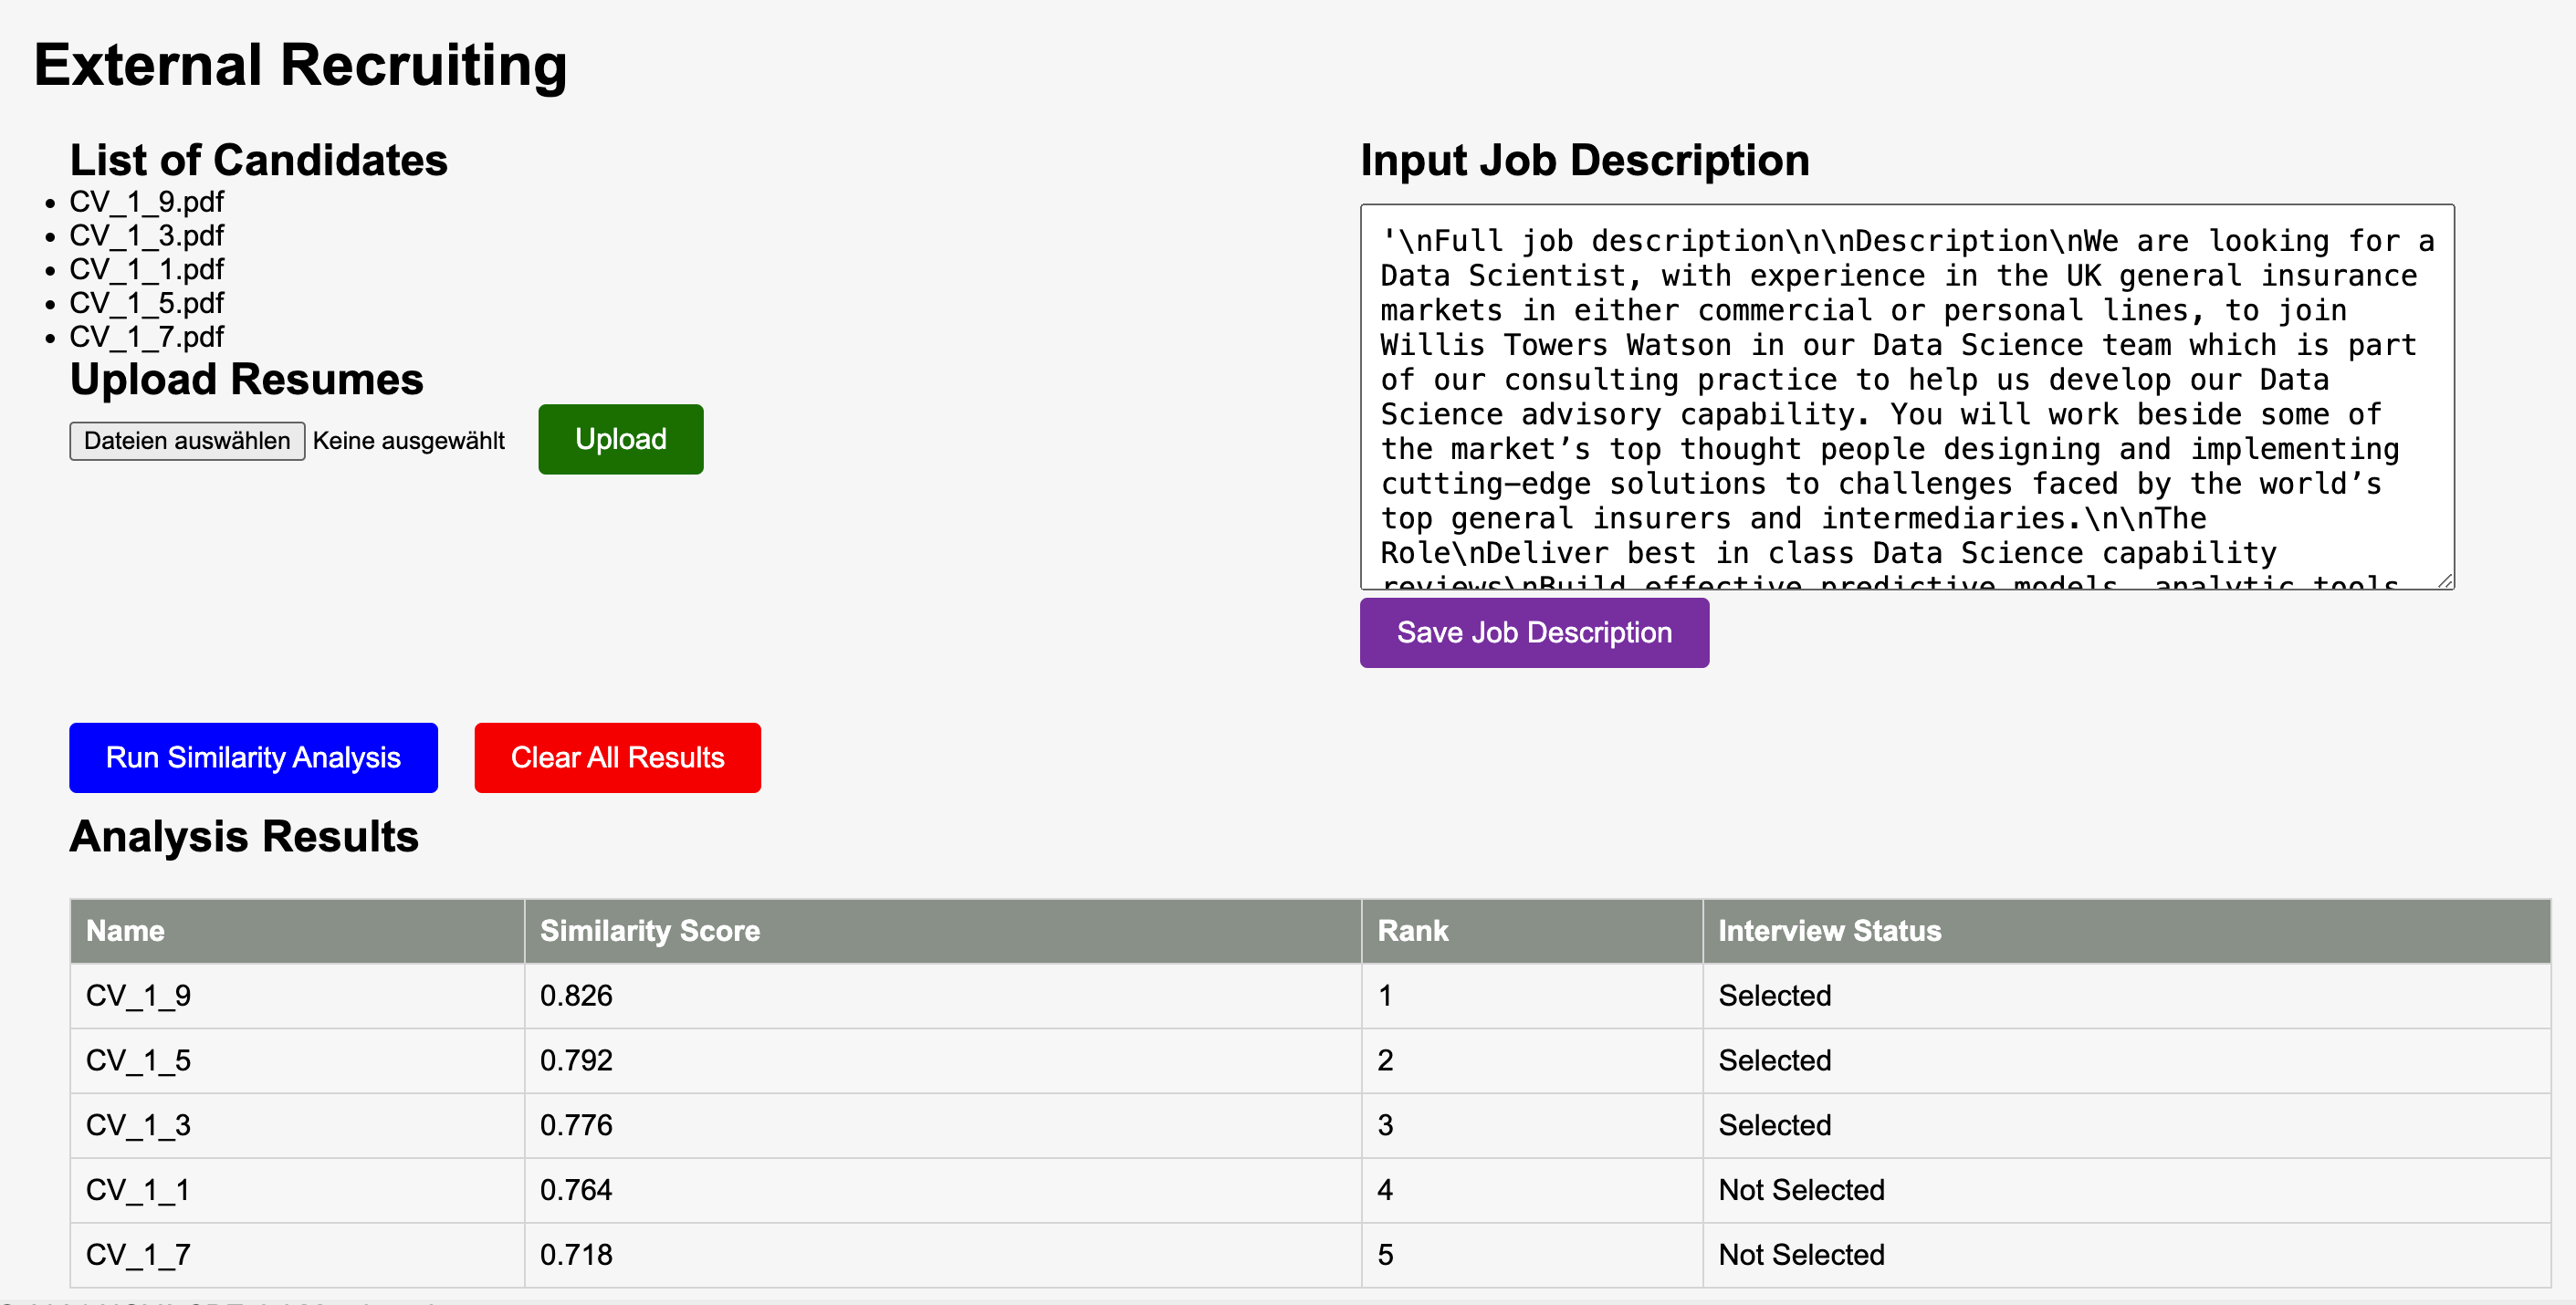

In [10]:
import os
import pandas as pd

# Set the API key and model name
MODEL = "gpt-4o-mini"
api_key = os.getenv("OPENAI_KEY")

# List to store the generated resumes
generated_resumes_list = []

# Iterate over each job description
for index, row in df_filtered.iterrows():
    job_id = row['Job ID']
    job_title = row['Job Title']
    job_description = row['JD']
    
    # Iterate over ranks 1 to 5
    for rank in range(1, 6):
        # System message providing context
        system_message = {
            "role": "system",
            "content": """
You are an AI assistant that generates realistic resumes for candidates in the tech sector.  
The goal is to simulate varying levels of fit between candidates and the provided job description based on a ranking system from 1 to 5, where:  
- **1 = Best Fit** (high alignment of skills and hidden skills patterns).  
- **5 = Lowest Fit** (minimal alignment and weak skill patterns).  

The ranking should depend on a **skills-first approach**, measuring:  
- **Alignment of skills**: How well the applicant’s skills match the skills required in the job description.  
- **Relation of skills**: How well the applicant’s skills complement the required skills and reveal meaningful hidden patterns that indicate a better fit.  

The ranking **must not depend** on:  
- Level of education.  
- Grades.
"""
        }
        
        # User message with specific instructions
        user_message = {
            "role": "user",
            "content": f"""
**Task:**

For the following job description, generate a unique resume of an individual applicant from the tech sector.
Assign a **ranking from 1 to 5** to the resume based on the following criteria:

**Ranking Criteria:**
1. **Best Fit (Rank 1):**
   - Skills are highly aligned with the job description, including strong direct matches (explicit skills overlap) and complementary skills (implicit patterns).
   - The resume demonstrates high relevance and depth in key skills critical for the job.

2. **Good Fit (Rank 2):**
   - Skills align well, with a mix of direct matches and complementary skills, but slightly less breadth or depth than Rank 1.

3. **Moderate Fit (Rank 3):**
   - Skills cover some relevant areas but may lack depth in critical skills or show limited complementary patterns.

4. **Low Fit (Rank 4):**
   - Few skills align directly with the job, and the complementary patterns are weak or incomplete.

5. **Lowest Fit (Rank 5):**
   - Minimal alignment with the job description, with significant gaps in required skills and little to no complementary patterns.

**Instructions:**
- Create realistic resumes for diverse individuals with:
  - Industry-relevant skills.
  - Diverse project experiences and certifications.
  - Unique names and individualized experiences.
  - Realistic KPIs and achievements to validate work experience.

- Simulate complex relationships between skills, avoiding reliance on simple keyword matches.
- Ensure higher-ranked resumes demonstrate clear progression in skill alignment, relevance, and relation. Lower-ranked resumes should show clear gaps or mismatches.

**Output Requirements:**
- The resume should be between **350-500 words**.
- Avoid explanatory notes or references to the ranking process.
- End the resume with a line indicating the rank: **Rank: {rank}**.

**Job Description:**

{job_description}

**Output Format:**

Provide the resume in plain text. Do not include the matching score in the resume.
"""
        }
        
        # Invoke the client's chat completion method
        completion = client.chat.completions.create(
            model=MODEL,
            messages=[
                system_message,
                user_message
            ]
        )
        
        # Extract the generated resume
        resume_text = completion.choices[0].message.content.strip()
        
        # Append the resume and associated data to the list
        generated_resumes_list.append({
            'Job Description ID': job_id,
            'Job Title': job_title,
            'Job description text (our input)': job_description,
            'CV ID': f"CV_{job_id}_{rank}",
            'CV name': f"Candidate_{job_id}_{rank}",
            'CV': resume_text,
            'Rank': rank
        })

# Create a DataFrame from the list of generated resumes
df_resumes2 = pd.DataFrame(generated_resumes_list)

# Display the DataFrame
df_resumes2


,Job Description ID,Job Title,Job description text (our input),CV ID,CV name,CV,Rank
0,1,"Senior Data Scientist, WTW, London",\nFull job description\n\nDescription\nWe are ...,CV_1_1,Candidate_1_1,"**Johnathan Reed** \nLondon, UK \njohnathan....",1
1,1,"Senior Data Scientist, WTW, London",\nFull job description\n\nDescription\nWe are ...,CV_1_2,Candidate_1_2,**Alexandra Johnson** \nData Scientist | UK G...,2
2,1,"Senior Data Scientist, WTW, London",\nFull job description\n\nDescription\nWe are ...,CV_1_3,Candidate_1_3,"**Jordan Taylor** \nData Scientist \nLondon,...",3
3,1,"Senior Data Scientist, WTW, London",\nFull job description\n\nDescription\nWe are ...,CV_1_4,Candidate_1_4,"**Johnathan Smith** \nLondon, UK | johnathan....",4
4,1,"Senior Data Scientist, WTW, London",\nFull job description\n\nDescription\nWe are ...,CV_1_5,Candidate_1_5,"**Johnathan Smith** \nLondon, UK \nEmail: jo...",5
5,2,"Software Engineer II, Android, Microsoft, London",\nFull job description\nOur SwiftKey app empow...,CV_2_1,Candidate_2_1,"**James Thompson** \nLondon, UK \njames.thom...",1
6,2,"Software Engineer II, Android, Microsoft, London",\nFull job description\nOur SwiftKey app empow...,CV_2_2,Candidate_2_2,"**Jane Doe** \nLondon, UK \njane.doe@example...",2
7,2,"Software Engineer II, Android, Microsoft, London",\nFull job description\nOur SwiftKey app empow...,CV_2_3,Candidate_2_3,"**John Smith** \nLondon, UK \nEmail: john.sm...",3
8,2,"Software Engineer II, Android, Microsoft, London",\nFull job description\nOur SwiftKey app empow...,CV_2_4,Candidate_2_4,**Jessica Taylor** \nEmail: jessica.taylor@em...,4
9,2,"Software Engineer II, Android, Microsoft, London",\nFull job description\nOur SwiftKey app empow...,CV_2_5,Candidate_2_5,"**Johnathan Smith** \nLondon, UK | johntsmith...",5


In [14]:
%pip install fpdf
import os
from fpdf import FPDF

# Define the folder path to save the PDF files
folder_path = "/Users/luca/Desktop/Master Thesis/cvs synthetic it.2"

# Function to save text as PDF
def save_as_pdf(text, cv_id):
    pdf = FPDF()
    pdf.add_page()
    pdf.set_font("Arial", size=12)
    # Encode text to latin-1, replacing unsupported characters
    text = text.encode('latin-1', 'replace').decode('latin-1')
    pdf.multi_cell(0, 10, text)
    file_path = os.path.join(folder_path, f"{cv_id}.pdf")
    pdf.output(file_path)

# Iterate over each row in the DataFrame
for index, row in df_resumes2.iterrows():
    cv_text = row["CV"]
    cv_id = row["CV ID"]
    save_as_pdf(cv_text, cv_id)

Note: you may need to restart the kernel to use updated packages.
